In [6]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

timezone = "Europe/Helsinki"
matplotlib.rcParams['figure.figsize'] = [16, 5]


In [2]:
def load_data(name):
    df=pd.read_csv("http://www.vuorenkoski.fi/nuottis/data/"+name+".csv", sep=",", error_bad_lines=False, warn_bad_lines=False)
    df.columns=["epoch",name]
    df["date"]=pd.to_datetime(df["epoch"], unit='ms', utc=True)
    df=df.set_index("date").drop(columns=["epoch"])
    df=df.tz_convert(tz=timezone)
    return df

# Sademäärien tarkastelu

dddfd

In [8]:
df=load_data("sade")
df=df[df["sade"]<20] # poistetaan virheelliset tallennukset

print(df["sade"].max())
df=df.groupby(pd.Grouper(freq="D")).sum()
df=df[df["sade"]>20]
#df["sade"].plot();

12.8


# Järven lämpotilat

/home/lauri/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1172: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  "will drop timezone information.", UserWarning)


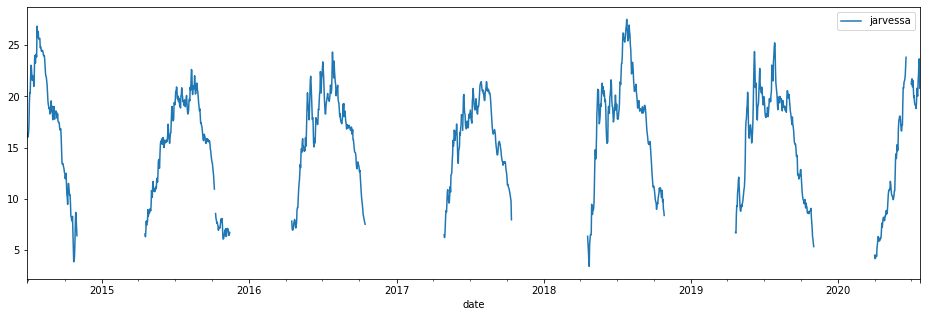

In [9]:
df=load_data("jarvessa")
df=df.groupby(pd.Grouper(freq="D")).mean()
df.plot();

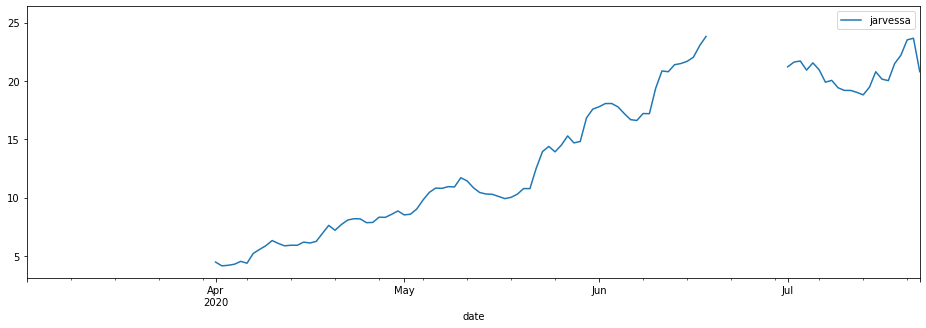

In [10]:
df[df.index>pd.Timestamp("2020-03", tz=timezone)].plot();

# Tuulen nopeus


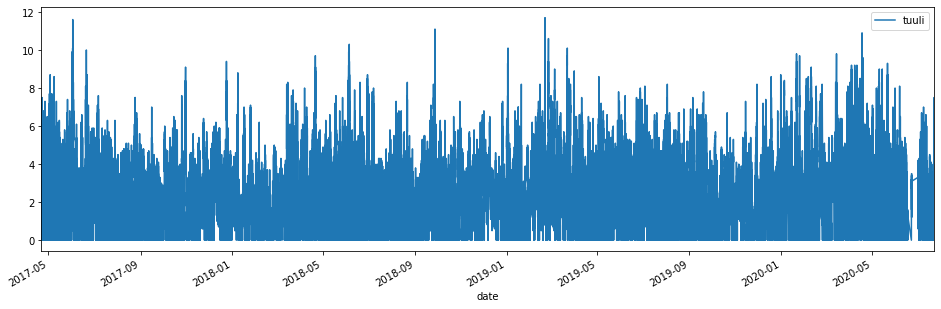

In [11]:
df=load_data("tuuli")
df=df[df["tuuli"]<40]
#df=df.groupby(pd.Grouper(freq="D")).max()
df.plot();

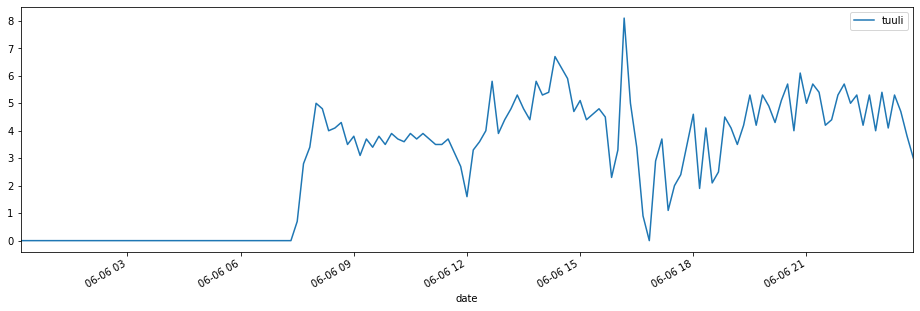

In [12]:
df[(df.index>pd.Timestamp("2020-06-06", tz=timezone)) & (df.index<pd.Timestamp("2020-06-07", tz=timezone))].plot();

# Kaivon data

In [17]:
df=load_data("kaivo")
df2=load_data("kaivo_virhe")
print(df2.shape)
df2["kaivo_virhe"]=pd.to_numeric(df2["kaivo_virhe"], errors="coerce")
df2=df2.dropna()
print(df2.shape)
print(df.tail(20))
print(df2.tail(20))


(16341, 1)
(15170, 1)
                           kaivo
date                            
2020-07-20 05:44:20+03:00  145.0
2020-07-20 05:54:47+03:00  145.0
2020-07-20 06:05:11+03:00  145.0
2020-07-20 06:15:34+03:00  145.0
2020-07-20 06:25:54+03:00  145.0
2020-07-20 06:36:20+03:00  145.0
2020-07-20 06:46:41+03:00  145.0
2020-07-20 06:57:04+03:00  145.0
2020-07-20 07:07:30+03:00  145.0
2020-07-20 07:17:50+03:00  145.0
2020-07-20 07:28:14+03:00  145.0
2020-07-20 07:38:40+03:00  145.0
2020-07-20 07:49:04+03:00  145.0
2020-07-20 07:59:20+03:00  145.0
2020-07-20 08:09:47+03:00  145.0
2020-07-20 08:20:14+03:00  145.0
2020-07-20 08:30:41+03:00  145.0
2020-07-20 08:41:01+03:00  145.0
2020-07-20 08:51:25+03:00  145.0
2020-07-20 09:01:49+03:00  145.0
                           kaivo_virhe
date                                  
2020-07-23 14:01:43+03:00          0.0
2020-07-23 14:01:50+03:00          0.0
2020-07-23 14:01:54+03:00          0.0
2020-07-23 14:12:05+03:00          0.0
2020-07-23 14:12:1

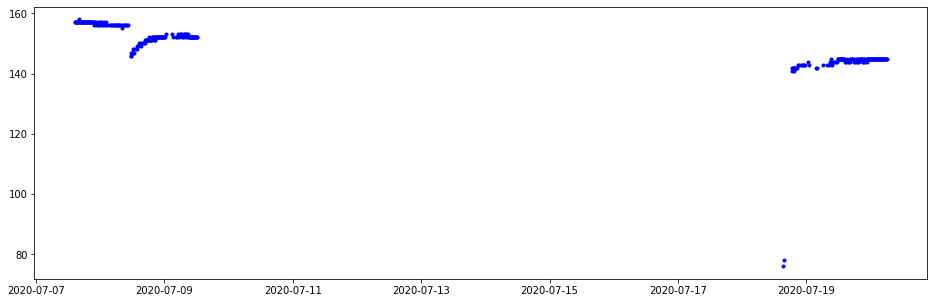

In [18]:
plt.plot(df.tail(300), "b.")
plt.show()

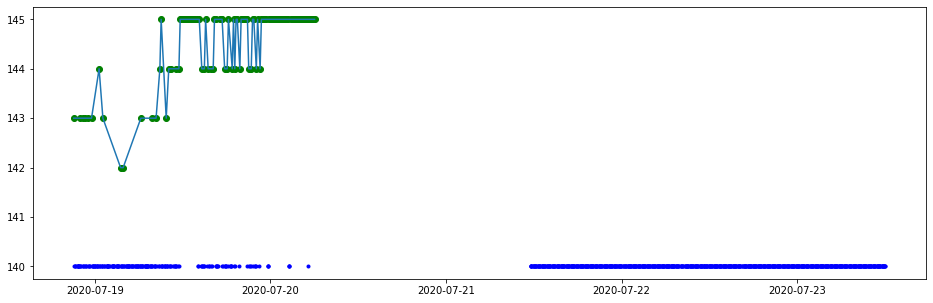

In [19]:
virhedata=df2.copy()
virhedata=virhedata[virhedata.index>pd.Timestamp("2020-07-19", tz=timezone)]
virhedata["piste"] = 140

plt.plot(virhedata["piste"], "b.")
plt.plot(df[df.index>pd.Timestamp("2020-07-19", tz=timezone)], "go")
plt.plot(df[df.index>pd.Timestamp("2020-07-19", tz=timezone)])
plt.show()